#  Pima indian Dataset-Logistic Regression (16-10-22)

### Features
- Preg= no. of pregnancy
- Plas= Plasma
- Pres= Blood Pressure
- skin= Skin thickness
- test= Insulin test
- mass= body mass
- pedi= diabetes pedigree function
- age= age
- class= target(whether diabetes or not,(1:diabetic,0: not diabetic)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
df=pd.read_csv(r'D:\Datasets\12.pima-indians-diabetes.csv',header=0)

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().any()

Preg     False
Plas     False
Pres     False
skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

- There is no null value in this dataset

In [5]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

- data types are also looking fine

In [6]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- however there are 0 values or outliers which represent that some tests are not done.
- therefore we must understand raw data evaluation is also as important.

<AxesSubplot: xlabel='mass', ylabel='class'>

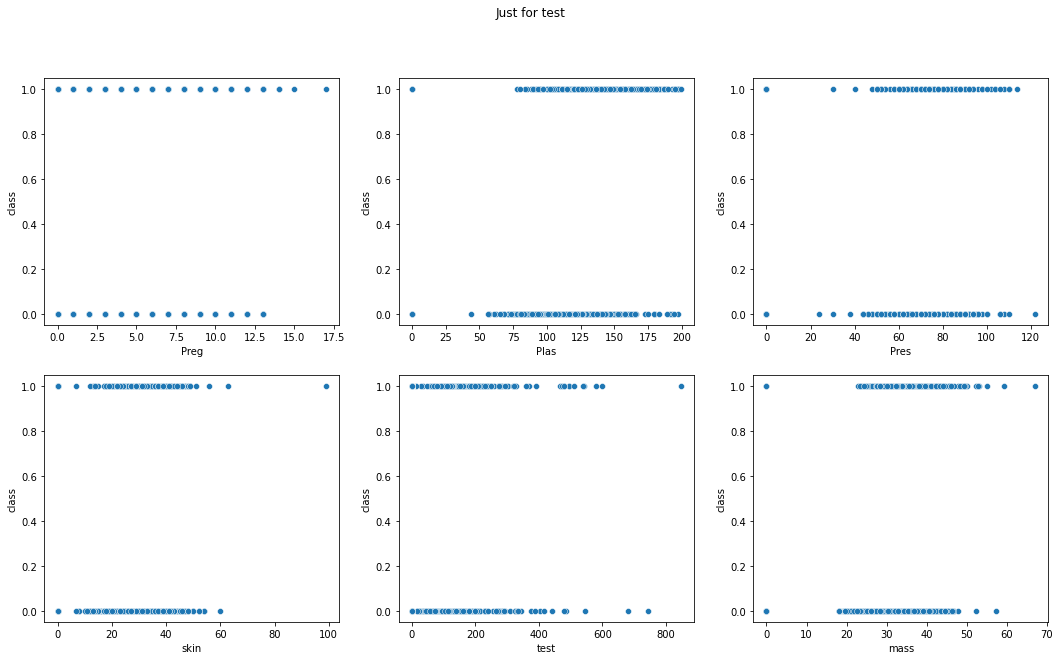

In [7]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
 
fig.suptitle('Just for test')
 
sns.scatterplot(ax=axes[0, 0], data=df, x='Preg', y='class')
sns.scatterplot(ax=axes[0, 1], data=df, x='Plas', y='class')
sns.scatterplot(ax=axes[0, 2], data=df, x='Pres', y='class')
sns.scatterplot(ax=axes[1, 0], data=df, x='skin', y='class')
sns.scatterplot(ax=axes[1, 1], data=df, x='test', y='class')
sns.scatterplot(ax=axes[1, 2], data=df, x='mass', y='class')

In [8]:
columns=list(df)[0:-1]

In [9]:
columns

['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']

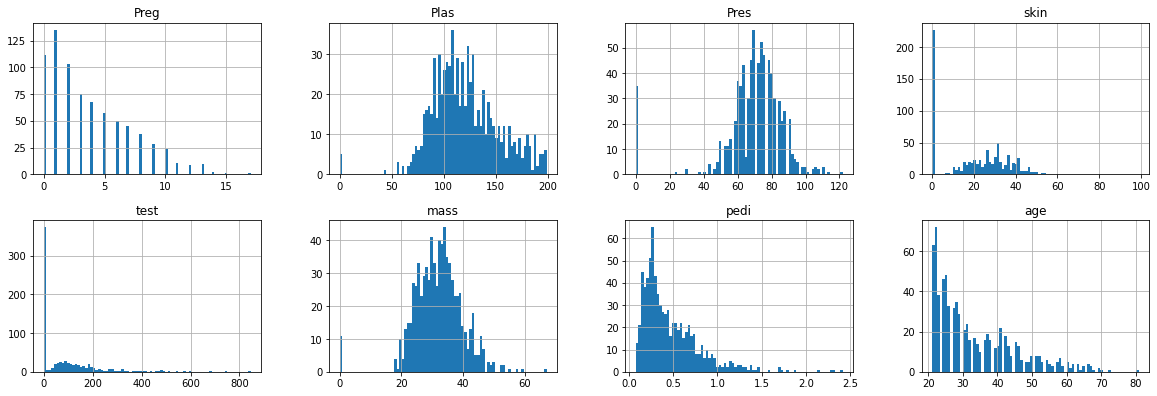

In [10]:
df[columns].hist(bins=80,figsize=(20,50),layout=(14,4))
plt.show()

### Observations
- Preg- is positivly skewed
- Plas- Plas is shown 0 for many which means either data was not taken or they were already dead. :)
- Pres- Same goes for blood pressure
- skin- same goes for skin thikness, are we treating skeletons
- test- similar for test
- mass- same goes for mass
- pedi- I have no idea what is it but it is positivly skewed
- age- is also positivly skewed

## Identify Correlation in data

In [11]:
corr=df.corr().round(2)
corr

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Plas,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
Pres,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
skin,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
test,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
mass,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
pedi,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
class,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


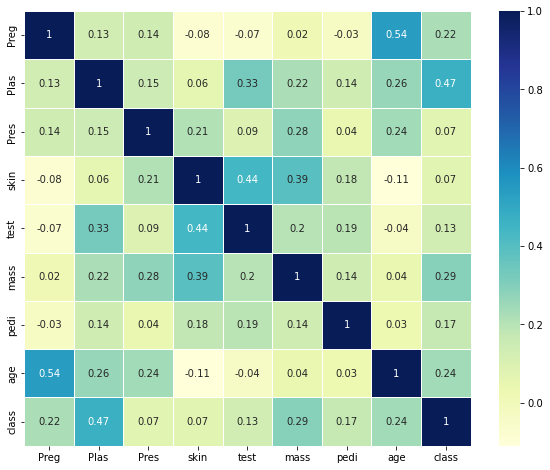

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap="YlGnBu")
plt.show()

- As we know that data is already suspecious, we haven't taken care of outliers yet
- So taking care of outlier is first step then we will recreate heatmap, this one is only to compare
- It can also be observed that none of inputs is showing strong enough correlation with "class"

## Calculate diabetes ratio of True /False

## Splitting the Data

- We will use 70% for model and 30% for testing

In [13]:
from sklearn.model_selection import train_test_split
x=df.drop('class',axis=1)
y=df['class']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [14]:
x_train

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [15]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: class, Length: 537, dtype: int64

## Data for missing values

- Let's replace zeros with mean

In [16]:
from sklearn.impute import SimpleImputer

replace_=SimpleImputer(missing_values=0,strategy='mean')
cols=x_train.columns

x_train=pd.DataFrame(replace_.fit_transform(x_train))
x_test=pd.DataFrame(replace_.fit_transform(x_test))

In [17]:
x_train.columns=cols
x_test.columns=cols

## Logistic Regression Model

In [18]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model=LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

## Making Predictions

In [19]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [20]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: class, Length: 231, dtype: int64

In [21]:
type(y_predict),type(y_test)

(numpy.ndarray, pandas.core.series.Series)

## Building confusion matrix

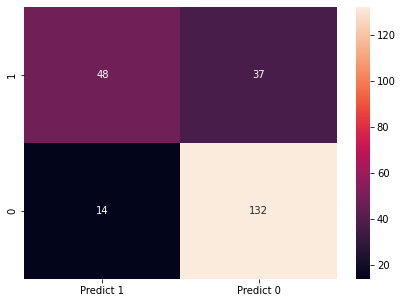

In [22]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])

# df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in['Predict 1','Predict 0']])
df_cm=pd.DataFrame(cm,index=['1','0'],columns=['Predict 1','Predict 0'])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')
plt.show()

In [23]:
print('Model Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_test,y_predict)))

Model Accuracy: 0.7792


# Naive's Bayes Method

In [24]:
from sklearn.naive_bayes import GaussianNB

model_=GaussianNB()

model_.fit(x_train,y_train)

GaussianNB()

# Performance of our model with training data

## Train data Prediction

In [25]:
train_prediction=model_.predict(x_train)
# train_prediction
pd.DataFrame(train_prediction).value_counts()

0    368
1    169
dtype: int64

In [26]:
print('Model Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train,train_prediction)))

Model Accuracy: 0.7393


## Train data Vs Predicted Train data Confusion matrix

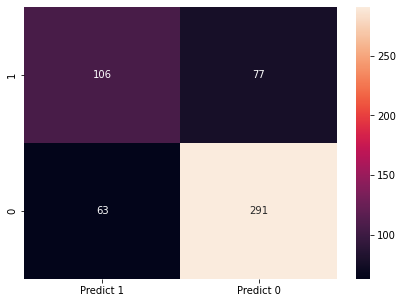

In [27]:
cm_2=metrics.confusion_matrix(y_train,train_prediction,labels=[1,0])

# df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in['Predict 1','Predict 0']])
df_cm_2=pd.DataFrame(cm_2,index=['1','0'],columns=['Predict 1','Predict 0'])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_2,annot=True,fmt='g')
plt.show()

## Test data Prediction

In [28]:
test_prediction=model_.predict(x_test)
pd.DataFrame(test_prediction).value_counts()

0    153
1     78
dtype: int64

In [29]:
print('Test Model Accuracy:{0:.4f}'.format(metrics.accuracy_score(y_test,test_prediction)))

Test Model Accuracy:0.7706


## Test data Vs Predicted test data Confusion matrix

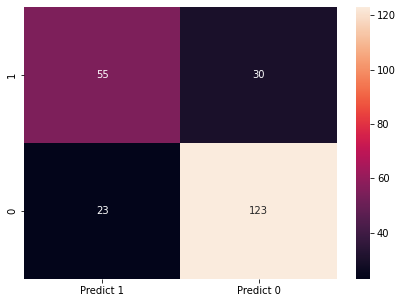

In [30]:
cm_3=metrics.confusion_matrix(y_test,test_prediction,labels=[1,0])

# df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in['Predict 1','Predict 0']])
df_cm_3=pd.DataFrame(cm_3,index=['1','0'],columns=['Predict 1','Predict 0'])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm_3,annot=True,fmt='g')
plt.show()

## Precision Score

In [31]:
# from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
print('Classification Report')
print(metrics.classification_report(y_test,test_prediction,labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.65      0.67        85
           0       0.80      0.84      0.82       146

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

